In [43]:
import random
import math
import copy
import cv2
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from skimage import color

In [44]:
def watermarkImage(input_image):
    
    S=[]
    
    plt.figure(1)
    plt.title('Original image')
    
    if len(input_image.shape)==2:
        M, N = input_image.shape
        embedded_image = copy.deepcopy(input_image)
        plt.imshow(embedded_image, cmap='gray')
    else:
        embedded_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
        M, N, C = input_image.shape
        S_R=[]
        S_G=[]
        S_B=[]
        plt.imshow(embedded_image)
             
    window_size = math.gcd(M,N) 
        
    for y in range(0,M,window_size):
        for x in range(0,N,window_size):
            if 'C' not in locals():
                _,s,_ = np.linalg.svd(embedded_image[y:y+window_size,x:x+window_size],full_matrices=True)
                plt.figure(2)
                plt.title('Singular values of grayscale image')
                plt.plot(s)
                S.append(s)
            else:
                _,s_r,_ = np.linalg.svd(embedded_image[y:y+window_size,x:x+window_size,0],full_matrices=True)
                _,s_g,_ = np.linalg.svd(embedded_image[y:y+window_size,x:x+window_size,1],full_matrices=True)
                _,s_b,_ = np.linalg.svd(embedded_image[y:y+window_size,x:x+window_size,2],full_matrices=True)
                plt.figure(2)
                plt.title('Singular values of R')
                plt.plot(s_r)
                plt.figure(3)
                plt.title('Singular values of G')
                plt.plot(s_g)
                plt.figure(4)
                plt.title('Singular values of B')
                plt.plot(s_b)
                S_R.append(s_r)
                S_G.append(s_g)
                S_B.append(s_b)
                
    if 'C' not in locals():
        S = np.array(S)
        
    else:
        S = np.array([S_R,S_G,S_B]) # S[0] R, S[1] G, S[2] B
        S_R = np.array(S_R)
        S_G = np.array(S_G)
        S_B = np.array(S_B)
        
    plt.figure()
    if 'C' not in locals():
        embedded_bits = [ random.randint(0,1) for bit in range(len(S))] # random hidden bits 0 or 1
        plt.title('Embedding with 0 or 1')
        for i,s in enumerate(S):
            if embedded_bits[i] == 0:
                s[a:b]=s[b]
                plt.subplot(211)
                plt.plot(s[a-10:b+10],'o-') # Embedding 0
            else:
                s[a:b]=s[a]
                plt.subplot(212)
                plt.plot(s[a-10:b+10],'o-') # Embedding 1
            S[i] = s
    else:
        embedded_bits = [ random.randint(0,1) for bit in range(S.shape[1])] # random hidden bits 0 or 1
        for i in range(S.shape[1]):
            if embedded_bits[i] == 0:
                plt.figure(5)
                B = S[:,i,b]
                S[0,i,a:b] = B[0]
                S[1,i,a:b] = B[1]
                S[2,i,a:b] = B[2]
                plt.subplot(311)
                plt.plot(S[0,i,a-10:b+10],'o-')
                plt.subplot(312)
                plt.plot(S[1,i,a-10:b+10],'o-')
                plt.subplot(313)
                plt.plot(S[2,i,a-10:b+10],'o-')
            else:
                plt.figure(6)
                A = S[:,i,a]
                S[0,i,a:b] = A[0]
                S[1,i,a:b] = A[1]
                S[2,i,a:b] = A[2]
                plt.subplot(311)
                plt.plot(S[0,i,a-10:b+10],'o-')
                plt.subplot(312)
                plt.plot(S[1,i,a-10:b+10],'o-')
                plt.subplot(313)
                plt.plot(S[2,i,a-10:b+10],'o-')
            #S[i] = s
    
    if 'C' not in locals():
        plt.figure()
        plt.title('S after embedded with hidden bits')
        for i,s in enumerate(S):
            plt.plot(s[a-10:b+10],'o:') # S after embedded informations
    else:
        for c in S:
            plt.figure()
            for s in c:
                plt.plot(s[a-10:b+10])
                
    # Reconstruction
    window_num = 0
    if 'C' not in locals():
        plt.figure()
        for y in range(0,M,window_size):
            for x in range(0,N,window_size):
                u,_,vh = np.linalg.svd(embedded_image[y:y+window_size,x:x+window_size],full_matrices=True)
                diag_s = np.diag(S[window_num])
                embedded_image[y:y+window_size,x:x+window_size] = np.dot(u,np.dot(diag_s,vh))
                window_num = window_num+1
        #plt.imshow(embedded_image,cmap='gray')

    else:
        plt.figure()
        for y in range(0,M,window_size):
            for x in range(0,N,window_size):
                for c in range(S.shape[0]): # color channel
                    u,_,vh = np.linalg.svd(embedded_image[y:y+window_size,x:x+window_size,c],full_matrices=True)
                    diag_s = np.diag(S[c,window_num,:])
                    embedded_image[y:y+window_size,x:x+window_size,c] = np.dot(u,np.dot(diag_s,vh))
                window_num = window_num+1        
        plt.imshow(embedded_image)
            
    return embedded_image

In [45]:
def extractImage(input_image):
    
    S = []
    
    if len(input_image.shape)==2:
        M, N = input_image.shape
    else:
        M, N, C = input_image.shape
        S_R=[]
        S_G=[]
        S_B=[]
        
    window_size = math.gcd(M,N)
    
    for y in range(0,M,window_size):
        for x in range(0,N,window_size):
            if 'C' not in locals():
                _,s,_ = np.linalg.svd(input_image[y:y+window_size,x:x+window_size],full_matrices=True)
                S.append(s)
            else:
                _,s_r,_ = np.linalg.svd(input_image[y:y+window_size,x:x+window_size,0],full_matrices=True)
                _,s_g,_ = np.linalg.svd(input_image[y:y+window_size,x:x+window_size,1],full_matrices=True)
                _,s_b,_ = np.linalg.svd(input_image[y:y+window_size,x:x+window_size,2],full_matrices=True)
                S_R.append(s_r)
                S_G.append(s_g)
                S_B.append(s_b)
    
    if 'C' not in locals():
        plt.figure()
        for i,s in enumerate(S):
            plt.plot(s[a-10:b+10],'o-')
    else:
        S = [S_R,S_G,S_B]
        for i,s in enumerate(S):
            plt.figure(i)
            for v in s:
                plt.plot(v[a-10:b+10],'o-')
            

In [46]:
a = 40 # left end of embedding information
b = 60 # right end of embedding information

In [47]:
image = cv2.imread('ImgSource/test2.jpg')
gray_image = gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


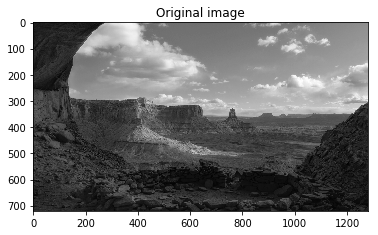

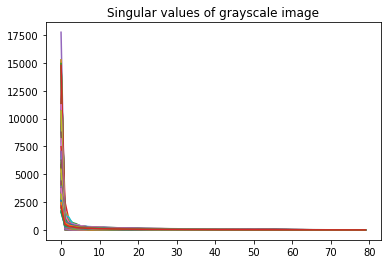

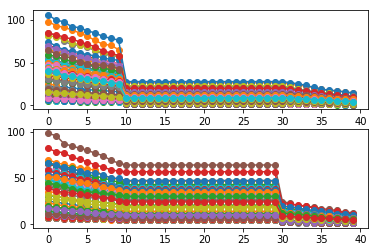

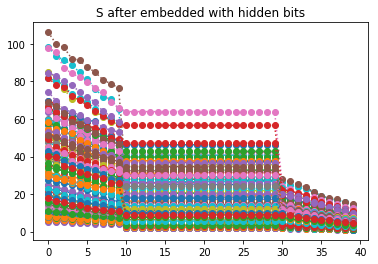

<Figure size 432x288 with 0 Axes>

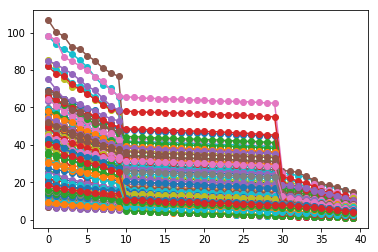

In [48]:
embedded_img = watermarkImage(gray_image)
extractImage(embedded_img)

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


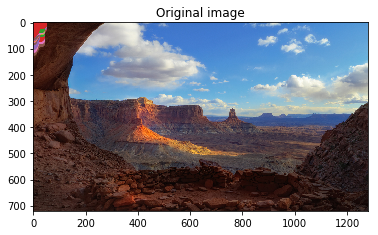

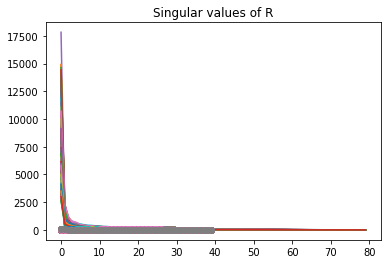

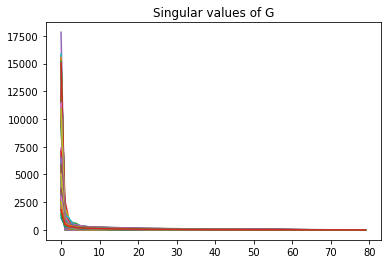

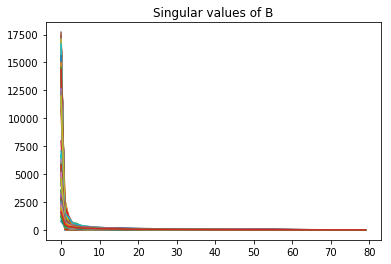

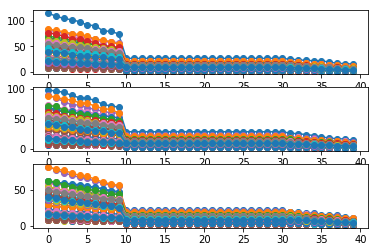

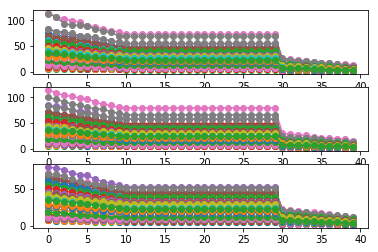

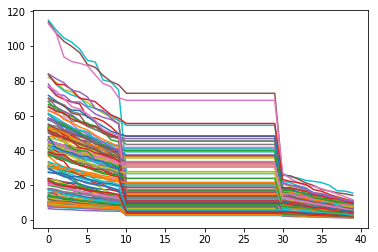

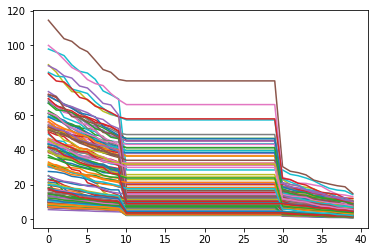

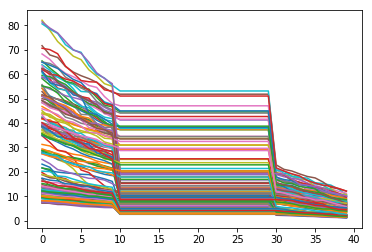

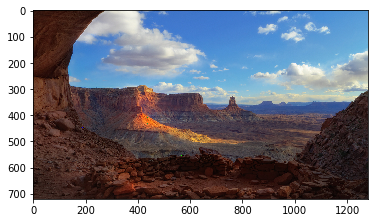

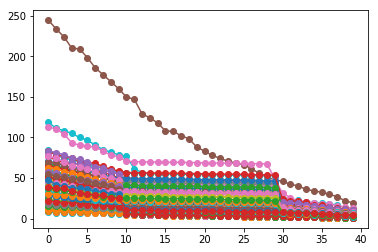

In [49]:
embedded_img = watermarkImage(image)
extractImage(embedded_img)